In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googlesearch import search
import tensorflow as tf
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError
import sys
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from sklearn.preprocessing import MinMaxScaler
from numpy import newaxis
import math

In [2]:
stock_name=input('Enter the name of the company/stock :')

Enter the name of the company/stock :microsoft


In [3]:
searches=stock_name+' stock yahoo'
searches

'microsoft stock yahoo'

In [4]:
results = []
for i in search(searches,     # The query you want to run
                tld = 'com',  # The top level domain
                lang = 'en',  # The language
                num = 10,     # Number of results per page
                start = 0,    # First result to retrieve
                stop = 10,    # Last result to retrieve
                pause = 2.0,  # Lapse between HTTP requests
               ):
    results.append(i)
    print(i)

https://finance.yahoo.com/quote/MSFT/
https://finance.yahoo.com/q/h?s=msft
https://in.finance.yahoo.com/q?s=msft
https://finance.yahoo.com/quote/MSFT,/
https://en.wikipedia.org/wiki/History_of_Yahoo!
https://en.wikipedia.org/wiki/Yahoo!
https://finbox.com/NASDAQGS:MSFT
https://www.marketbeat.com/stocks/NASDAQ/MSFT/news/
https://www.moneycontrol.com/news/tags/microsoft-yahoo-finance.html
https://stocktwits.com/symbol/MSFT


In [5]:
string=results[0]
words=string.split('/')
name=words[-2]
name

'MSFT'

In [6]:
my_share = share.Share(name)
database = None

try:
    database = my_share.get_historical( share.PERIOD_TYPE_YEAR,1
                                          ,share.FREQUENCY_TYPE_DAY,1)
except YahooFinanceError as e:
    print(e.message)
    sys.exit(1)

In [7]:
data=pd.DataFrame(database)

In [8]:
data.head()

,timestamp,open,high,low,close,volume
0,1553866200000,118.070000,118.320000,116.959999,117.940002,25399800
1,1554125400000,118.949997,119.110001,118.099998,119.019997,22789100
2,1554211800000,119.059998,119.480003,118.519997,119.190002,18142300
3,1554298200000,119.860001,120.430000,119.150002,119.970001,22860700
4,1554384600000,120.099998,120.230003,118.379997,119.360001,20112800


In [9]:
high=data['high'].as_matrix()
low=data['low'].as_matrix()
price=(high+low)/2

C:\Users\ARSHTVIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ARSHTVIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


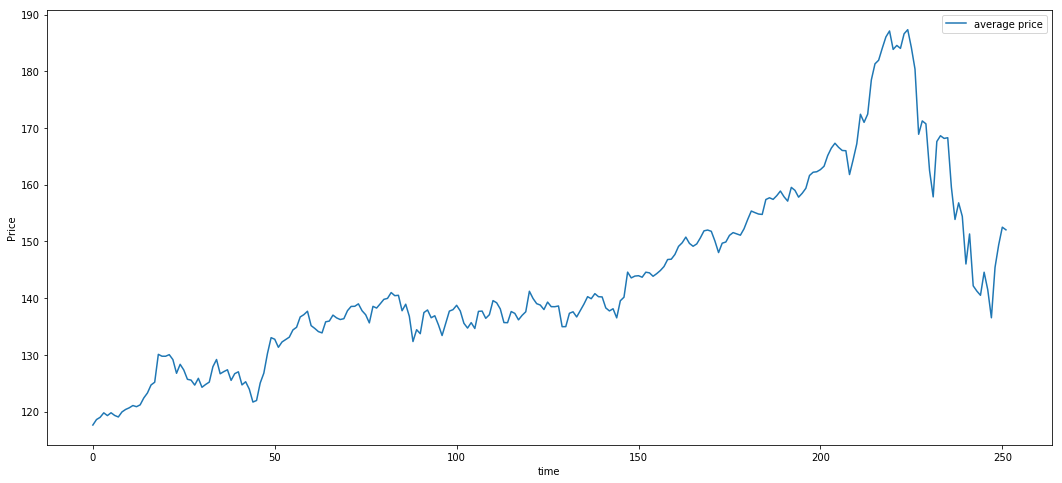

In [10]:
plt.figure(figsize=(18,8))
plt.plot(price)
plt.xlabel('time')
plt.ylabel('Price')
plt.legend(['average price'])
plt.show()

In [11]:
train_perc=math.floor(data['high'].count()*0.9)
train_perc

226

In [12]:
train_data=price[0:train_perc]
test_data=price[train_perc:]

In [13]:
sc=MinMaxScaler(feature_range=(0,1))
train_data=train_data.reshape(-1,1)
test_data=test_data.reshape(-1,1)
train_data=sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

In [14]:
def create_dataset(dataset, look_back):
    X_data, Y_data = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X_data.append(a)
        Y_data.append(dataset[i + look_back, 0])
    return np.array(X_data), np.array(Y_data)

In [15]:
look_back=5
forward_data=3

In [16]:
X_train,Y_train=create_dataset(train_data,look_back)
X_test,Y_test=create_dataset(test_data,look_back)
X_train.shape

(220, 5)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], 1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1,X_test.shape[1]))

In [18]:
model = Sequential([
LSTM(256,return_sequences=True),
LSTM(512,return_sequences=True),
Dropout(0.1),
LSTM(1024,return_sequences=False),
Dropout(0.15),
Dense(1),
])

W0328 15:58:32.106365 10484 deprecation.py:506] From C:\Users\ARSHTVIK\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.compile(optimizer='adam',loss='mse')

In [20]:
history=model.fit(X_train,Y_train,epochs=20)

W0328 15:58:34.524834 10484 deprecation.py:323] From C:\Users\ARSHTVIK\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
220/220 [==============================] - 14s 65ms/sample - loss: 0.1259
Epoch 2/20
220/220 [==============================] - 1s 2ms/sample - loss: 0.0323
Epoch 3/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0151
Epoch 4/20
220/220 [==============================] - 1s 2ms/sample - loss: 0.0145
Epoch 5/20
220/220 [==============================] - 1s 3ms/sample - loss: 0.0072
Epoch 6/20
220/220 [==============================] - 1s 3ms/sample - loss: 0.0030
Epoch 7/20
220/220 [==============================] - 1s 3ms/sample - loss: 0.0015
Epoch 8/20
220/220 [==============================] - 1s 3ms/sample - loss: 0.0013 0s - loss: 0.0
Epoch 9/20
220/220 [==============================] - 1s 3ms/sample - loss: 0.0013
Epoch 10/20
220/220 [==============================] - 1s 3ms/sample - loss: 0.0012
Epoch 11/20
220/220 [==============================] - 1s 3ms/sample - loss: 0.0012
Epoch 12/20
220/220 [==============================] - 1s 3ms/sample

In [21]:
model.evaluate(X_test,Y_test)

20/20 [==============================] - 1s 46ms/sample - loss: 0.0267


0.026739364489912987

In [22]:
fut=model.predict(X_test)
pres=model.predict(X_train)

In [23]:
future=sc.inverse_transform(fut)
past=sc.inverse_transform(pres)
true_y=sc.inverse_transform(Y_test.reshape(-1,1))
past_y=sc.inverse_transform(Y_train.reshape(-1,1))
print(future.shape)
print(true_y.shape)

(20, 1)
(20, 1)


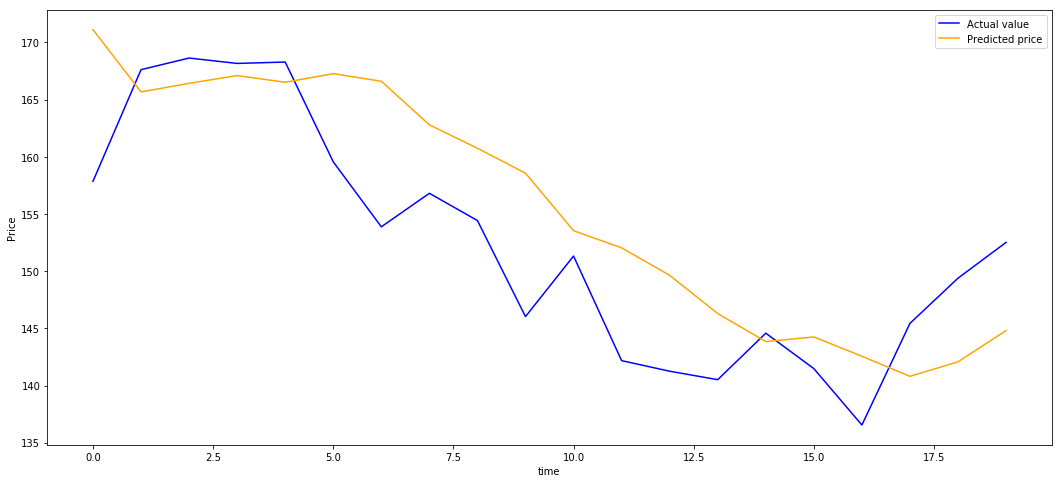

In [24]:
plt.figure(figsize=(18,8))
plt.plot(true_y,color='blue',label='Actual value')
plt.plot(future,color='orange',label='Predicted price')
plt.ylabel('Price')
plt.xlabel('time')
plt.legend()
plt.show()

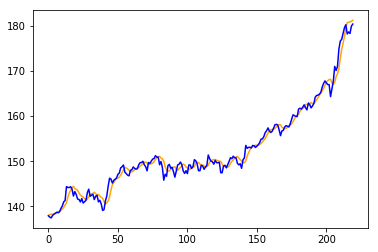

In [25]:
plt.plot(past,color='orange')
plt.plot(past_y,color='blue')
plt.show()

In [26]:
avg=np.reshape(price,(-1,1))
avg=sc.fit_transform(avg)
X,Y=create_dataset(avg,look_back)
X=np.reshape(X, (X.shape[0], 1,X.shape[1]))

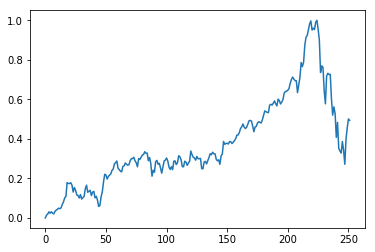

In [27]:
YT=price.reshape(-1,1)
YT=sc.fit_transform(YT)
plt.plot(YT)
plt.show()

In [28]:
predict,_=create_dataset(fut,look_back)
#predict=np.array(predict)
predict=np.reshape(predict, (predict.shape[0], 1,predict.shape[1]))

In [29]:
predictions=model.predict(predict)

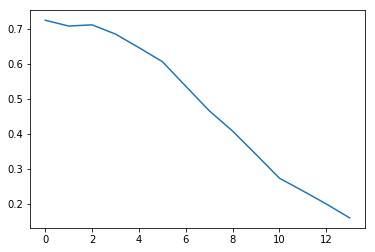

In [30]:
plt.plot(predictions)
plt.show()

In [31]:
g=np.append(avg,predictions)

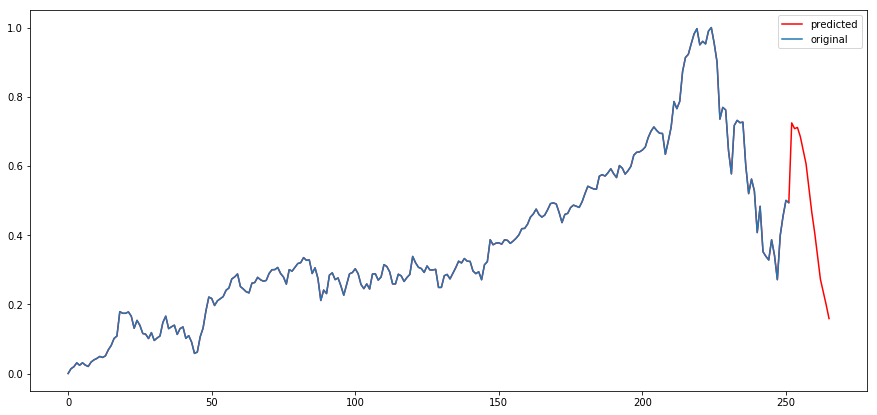

In [32]:
plt.figure(figsize=(15,7))
plt.plot(g,color='red',label='predicted')
plt.plot(YT,label='original')
#plt.plot(g,color='red',label='predicted')
plt.legend()
plt.show()